In [ ]:
# 행렬 = 여러개의 점들 N x D
# 주어진 한 점 = D차원

# 행렬에 있는 점들 ~ 주어진 한 점
# 사이의 거리를 구하는 것 

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 코드 실행 시간 측정
from pytictoc import TicToc

In [48]:
# 행렬을 쌓는 함수
# hstack = 가로로, vstack = 세로로

x = np.arange(10)
y = 2*x

# numpy 벡터 = 행 벡터가 디폴트
z1 = np.hstack([x,y])
z2 = np.vstack([x,y])

print(x)
print(z1.shape)
print(z2.shape)

print(z1)
print(z2)

[0 1 2 3 4 5 6 7 8 9]
(20,)
(2, 10)
[ 0  1  2  3  4  5  6  7  8  9  0  2  4  6  8 10 12 14 16 18]
[[ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]]


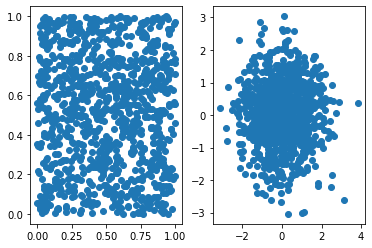

In [12]:
X = np.random.rand(1000,2)
Y = np.random.randn(1000,2)

plt.figure()
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1])
plt.subplot(1,2,2)
plt.scatter(Y[:,0], Y[:,1])

In [18]:
X = np.random.rand(10,2)

print(X)

print(np.sum(X))
print(np.sum(X, axis = 0)) # 행에 대해서 덧셈, 결과는 열(2,1)
print(np.sum(X, axis = 1)) # 열에 대해서 덧셈, 결과는 행(10,1)

print(np.mean(X))
print(np.mean(X, axis = 0))
print(np.mean(X, axis = 1))

[[0.38372312 0.01502476]
 [0.65660403 0.25153062]
 [0.84379947 0.19195215]
 [0.81594108 0.76884958]
 [0.28041946 0.51575182]
 [0.47496282 0.52553338]
 [0.97081879 0.13946847]
 [0.90351965 0.0499756 ]
 [0.12379849 0.86406345]
 [0.04169709 0.57867952]]
9.396113337381804
[5.49528401 3.90082933]
[0.39874788 0.90813465 1.03575161 1.58479066 0.79617128 1.0004962
 1.11028726 0.95349525 0.98786194 0.62037661]
0.4698056668690902
[0.5495284  0.39008293]
[0.19937394 0.45406733 0.51787581 0.79239533 0.39808564 0.5002481
 0.55514363 0.47674763 0.49393097 0.3101883 ]


In [25]:
x = np.random.rand(10)
print(x)
print(np.max(x)) # 들어있는 값 중 제일 큰 값을 리턴
print(np.argmax(x)) # 들어있는 값 중 제일 큰 값이 있는 인덱스를 리턴
print(np.min(x))
print(np.argmin(x))

# np.max(x) = x[np.argmax(x)]
# np.min(x) = x[np.argmin(x)]
      
print(np.where(x >= 0.9))

[0.61208674 0.97943305 0.78970899 0.07664294 0.7474394  0.04903915
 0.66051329 0.12072353 0.54334456 0.65512254]
0.9794330479665375
1
0.049039153998354346
5
(array([1], dtype=int64),)


[-0.45530106  1.53219573  0.98305781  0.58299265  2.16828403]


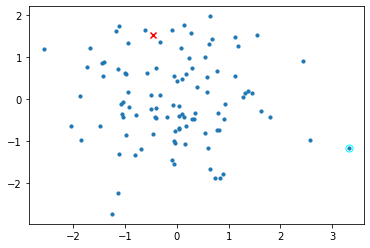

In [35]:
N = 100 # 샘플의 갯수
D = 5

X = np.random.randn(N,D) # N x D, N개의 점, D차원의 벡터
z = np.random.randn(D) # 거리를 구할 기준점 한 개

Dist = np.zeros(N)

for n in range(N):
    
    Dist[n] = np.sqrt((X[n,0] - z[0])**2 + (X[n,1] - z[1])**2)
    
idLong = np.argmax(Dist)

plt.scatter(X[idLong,0], X[idLong,1], s = 50, edgecolor = 'cyan', facecolor = 'w')
plt.scatter(X[:,0], X[:,1], s = 10)
plt.scatter(z[0], z[1], marker = 'x', facecolor = 'r')

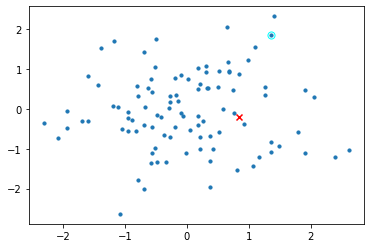

In [36]:
N = 100 # 샘플의 갯수
D = 5


X = np.random.randn(N,D) # N x D, N개의 점, D차원의 벡터
z = np.random.randn(D) # 거리를 구할 기준점 한 개

Dist = np.zeros(N)

for n in range(N):
    
    for d in range(D):
        Dist[n] += (X[n,d] - z[d])**2
    Dist[n] = np.sqrt(Dist[n])
    
idLong = np.argmax(Dist)

plt.scatter(X[idLong,0], X[idLong,1], s = 50, edgecolor = 'cyan', facecolor = 'w')
plt.scatter(X[:,0], X[:,1], s = 10)
plt.scatter(z[0], z[1], marker = 'x', facecolor = 'r')

Elapsed time is 0.001264 seconds.
Elapsed time is 0.001484 seconds.


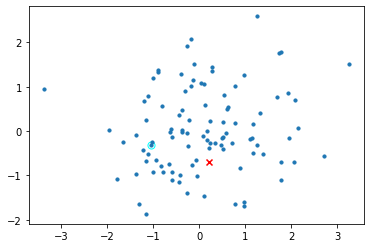

In [41]:
N = 100 # 샘플의 갯수
D = 5
t = TicToc()

X = np.random.randn(N,D) # N x D, N개의 점, D차원의 벡터
z = np.random.randn(D) # 거리를 구할 기준점 한 개

Dist1 = np.zeros(N)
Dist2 = np.zeros(N)

t.tic()

for n in range(N):
    
    for d in range(D):
        Dist1[n] += (X[n,d] - z[d])**2
    Dist1[n] = np.sqrt(Dist1[n])

t.toc()

t.tic()
for n in range(N):
    Dist2[n] = np.sqrt(np.sum((X[n,:] - z)**2))

t.toc()

idLong = np.argmax(Dist)

plt.scatter(X[idLong,0], X[idLong,1], s = 50, edgecolor = 'cyan', facecolor = 'w')
plt.scatter(X[:,0], X[:,1], s = 10)
plt.scatter(z[0], z[1], marker = 'x', facecolor = 'r')

[[0 1]
 [2 3]]
[[0 1 0 1 0 1]
 [2 3 2 3 2 3]
 [0 1 0 1 0 1]
 [2 3 2 3 2 3]]
[[-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.24290559  3.46424779]
 [-1.46913995  1.07007455  0.70478833 -0.2

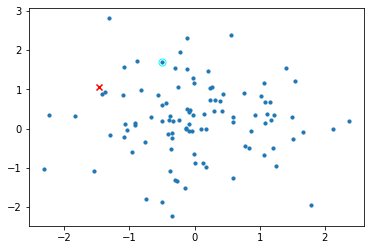

In [47]:
import numpy.matlib

X = np.arange(4)
X = X.reshape(2,2)

print(X)

print(np.matlib.repmat(X,2,3))

N = 100 # 샘플의 갯수
D = 5
t = TicToc()

X = np.random.randn(N,D) # N x D, N개의 점, D차원의 벡터
z = np.random.randn(D) # 거리를 구할 기준점 한 개

Dist1 = np.zeros(N)
Dist2 = np.zeros(N)

Z = np.matlib.repmat(z.reshape(1,D), N, 1)

Dist3 = np.sum((X-Z)**2, axis = 1)

idLong = np.argmax(Dist)

plt.scatter(X[idLong,0], X[idLong,1], s = 50, edgecolor = 'cyan', facecolor = 'w')
plt.scatter(X[:,0], X[:,1], s = 10)
plt.scatter(z[0], z[1], marker = 'x', facecolor = 'r')